In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
sns.set()

%matplotlib inline
plt.style.use('ggplot')


https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f
https://elitedatascience.com/python-seaborn-tutorial#step-5

# Weather dataset preprocessing
**keeping only the necessary features to predict how traffic is affected by various weather conditions.**
**future aim: using machine learning models and time series analysis**

In [2]:
main_data=pd.read_csv('C:\\Users\\Taha\\Documents\\SUMMER\\datathon2020\\weather_data (2).csv')
data=main_data
data


,city_name,lat,lon,main/temp,main/temp_min,main/temp_max,main/feels_like,main/pressure,main/humidity,wind/speed,...,weather/0/icon,dt,dt_iso,timezone,rain/1h,weather/1/id,weather/1/main,weather/1/description,weather/1/icon,rain/3h
0,Dubai,25.07501,55.188761,14.99,13.0,18.00,13.70,1015,87,3.1,...,01n,1514764800,2018-01-01 00:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
1,Dubai,25.07501,55.188761,14.63,13.0,17.00,13.91,1015,93,2.6,...,01n,1514768400,2018-01-01 01:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
2,Dubai,25.07501,55.188761,14.03,12.0,17.00,13.89,1016,93,1.5,...,01n,1514772000,2018-01-01 02:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
3,Dubai,25.07501,55.188761,13.78,12.0,17.00,13.14,1016,93,2.1,...,50n,1514775600,2018-01-01 03:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
4,Dubai,25.07501,55.188761,14.28,12.0,18.00,13.45,1017,93,2.6,...,50d,1514779200,2018-01-01 04:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,Dubai,25.07501,55.188761,22.85,21.0,25.45,22.19,1015,64,3.6,...,01n,1584385200,2020-03-16 19:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
19340,Dubai,25.07501,55.188761,22.35,21.0,24.00,21.17,1015,68,4.6,...,01n,1584388800,2020-03-16 20:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
19341,Dubai,25.07501,55.188761,21.52,20.0,23.36,21.43,1015,72,3.1,...,01n,1584392400,2020-03-16 21:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN
19342,Dubai,25.07501,55.188761,21.04,19.0,23.36,21.19,1014,77,3.1,...,01n,1584396000,2020-03-16 22:00:00 +0000 UTC,14400,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("\n\n\nData Description :\n\n")
print(data.describe())
list(data.columns.values)
print("\n\n\nNull value Analysis :\n\n")
print(data.notna().sum())
data=data.drop(['city_name','lat','lon','main/temp_min','main/temp_max','weather/0/id','weather/1/id','weather/0/icon',
                'weather/1/main','weather/1/description','timezone','weather/1/icon'],axis=1)
print(data.columns.values)
column_names = ['dt_iso','dt','main/temp', 'main/feels_like', 'main/pressure', 'main/humidity',
       'wind/speed', 'wind/deg', 'clouds/all', 'rain/1h', 'rain/3h', 'weather/0/main',
       'weather/0/description']

data = data.reindex(columns=column_names)
data=data.rename(columns={"main/temp":"temp",
                   "main/feels_like":"temp_feels_like",
                   "main/pressure":"main_pressure",
                   "main/humidity":"humidity",
                   "wind/speed":"wind_speed",
                   "wind/deg":"wind_deg",
                   "clouds/all":"clouds",
                   "rain/1h":"rain_1h",
                   "rain/3h":"rain_3h", 
                   "weather/0/main":"weather_main",
                   "weather/0/description":"weather_description"})
data['dt_iso']=data['dt_iso'].str[0:19]





Data Description :


                lat           lon     main/temp  main/temp_min  main/temp_max  \
count  1.934400e+04  1.934400e+04  19344.000000   19344.000000   19344.000000   
mean   2.507501e+01  5.518876e+01     28.102823      26.661868      29.810532   
std    1.291090e-11  2.732107e-11      7.329419       7.580049       7.240840   
min    2.507501e+01  5.518876e+01     10.890000       7.000000      12.000000   
25%    2.507501e+01  5.518876e+01     22.030000      20.920000      23.840000   
50%    2.507501e+01  5.518876e+01     28.060000      26.670000      30.000000   
75%    2.507501e+01  5.518876e+01     33.880000      32.810000      35.122500   
max    2.507501e+01  5.518876e+01     45.940000      45.360000      48.000000   

       main/feels_like  main/pressure  main/humidity    wind/speed  \
count     19344.000000   19344.000000   19344.000000  19344.000000   
mean         27.684793    1009.416098      52.495089      3.879056   
std           8.309911       8.01700

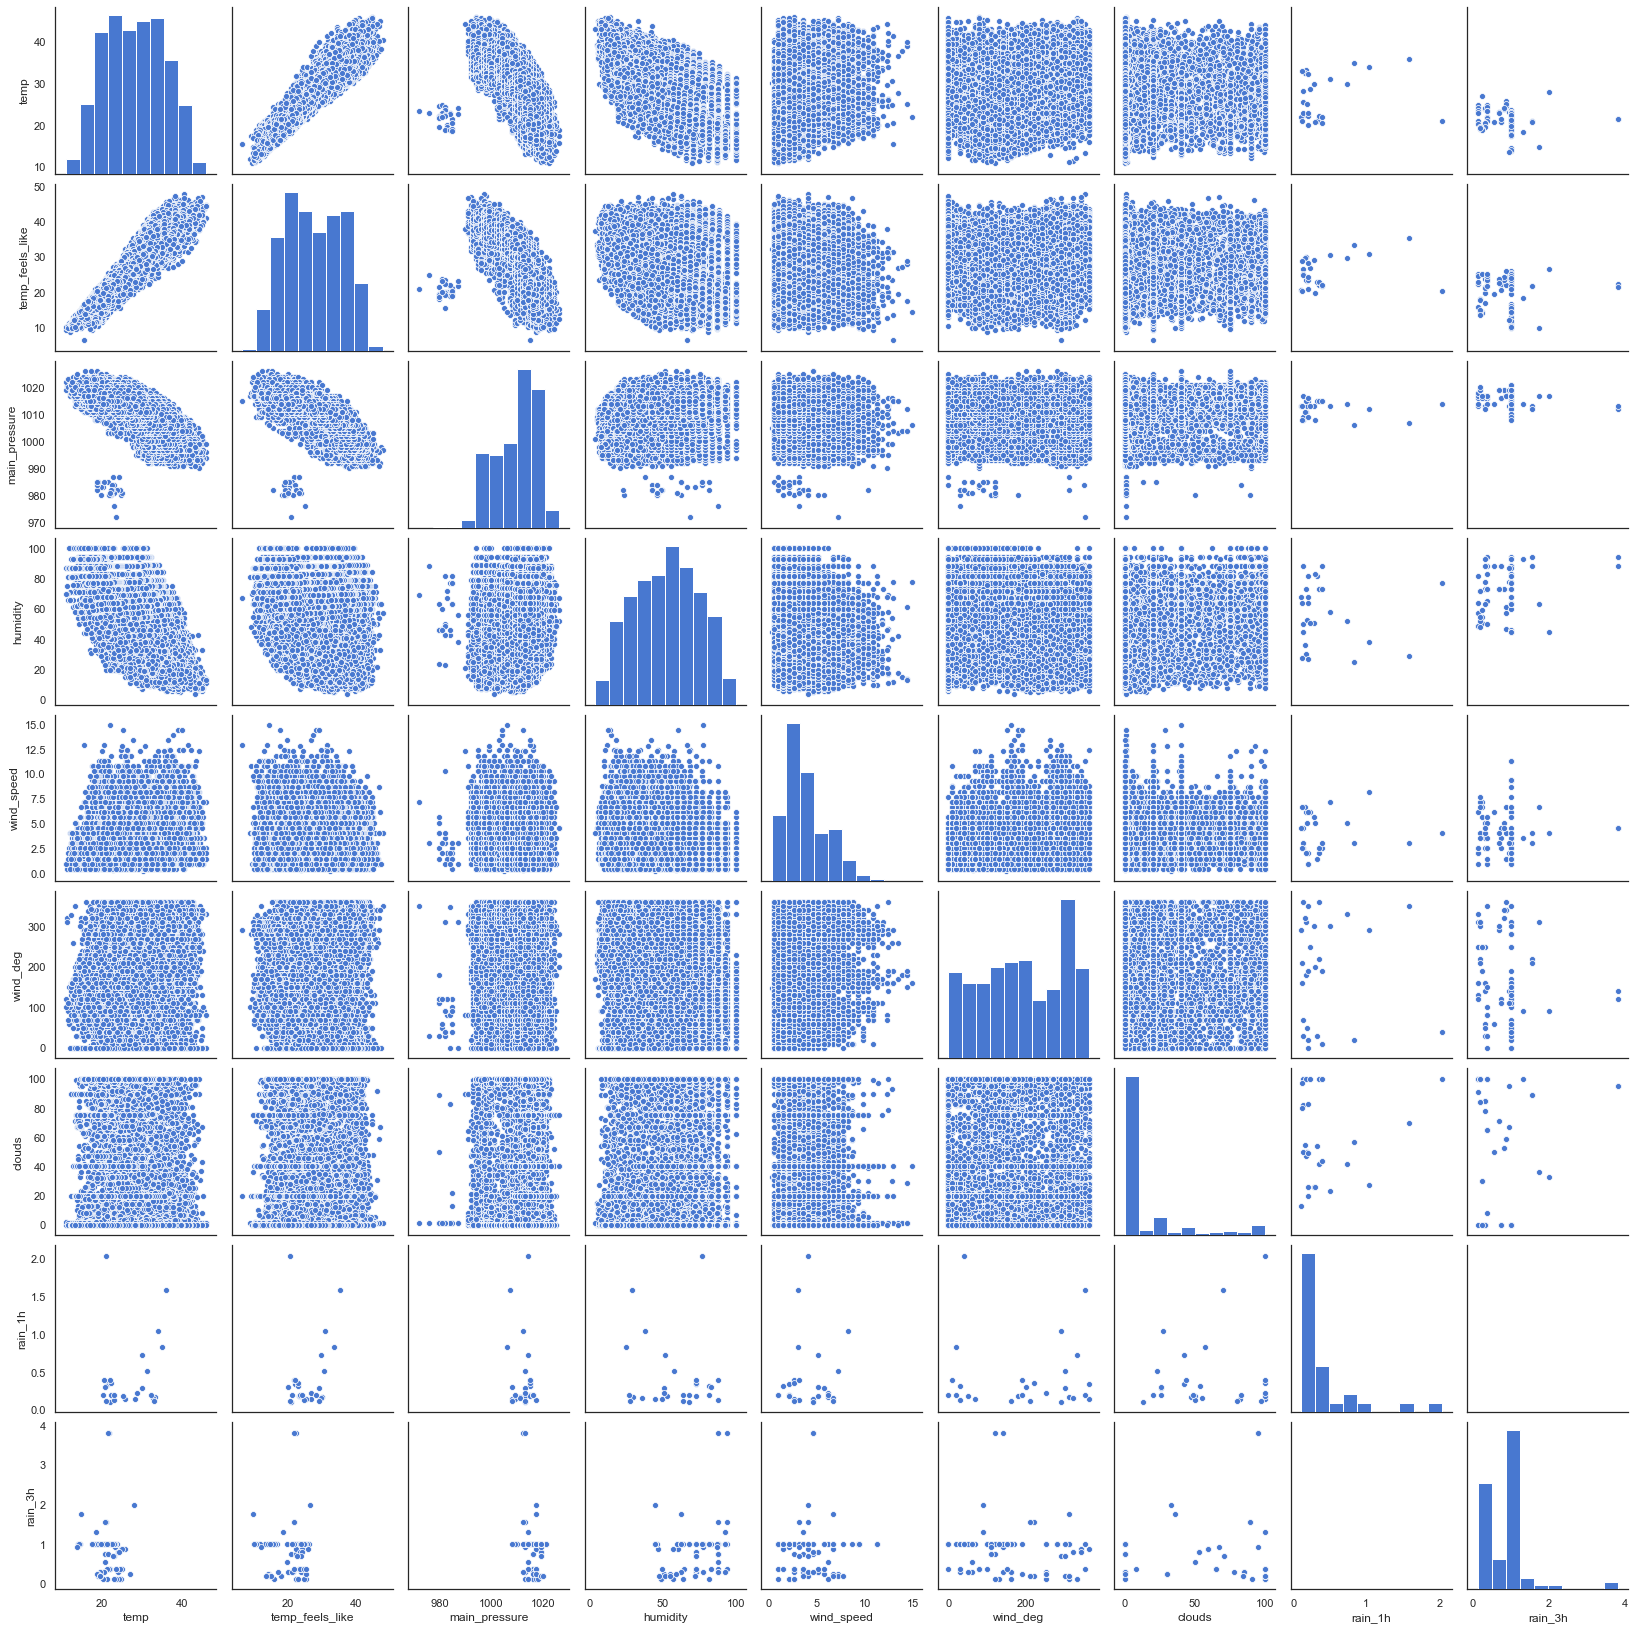

In [4]:
plottable=['temp', 'temp_feels_like', 'main_pressure', 'humidity','wind_speed', 'wind_deg', 'clouds', 'rain_1h', 'rain_3h','weather_main']
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns.pairplot(
    data[plottable],
)
sns.despine()

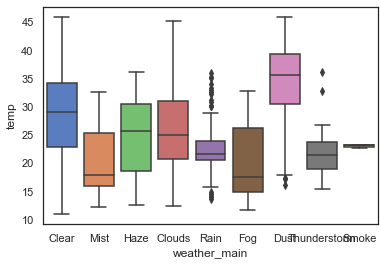

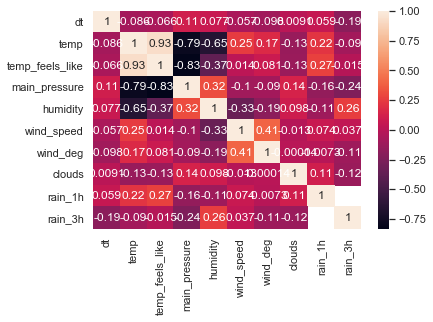

In [5]:
sns.boxplot(data=data,x='weather_main',y='temp')
plt.show()

corrmatrix=data.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

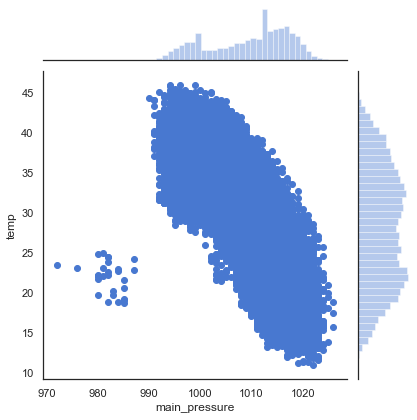

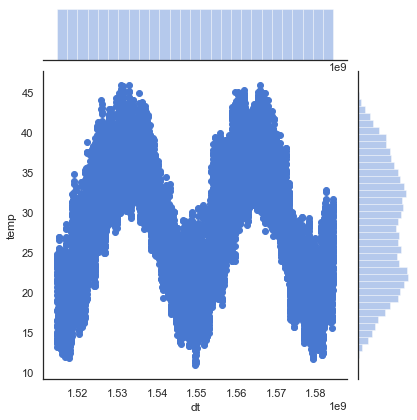

In [6]:
    sns.jointplot(
    x='main_pressure',
    y='temp',
    data=data,
    kind='scatter' # or 'kde' or 'hex'
    )
    sns.jointplot(
    x='dt',
    y='temp',
    data=data,
    kind='scatter',# or 'kde' or 'hex'
    
        )

In [7]:
data['date']=data['dt_iso'].str[11:13]
data['date']=data['date'].apply(pd.to_numeric)

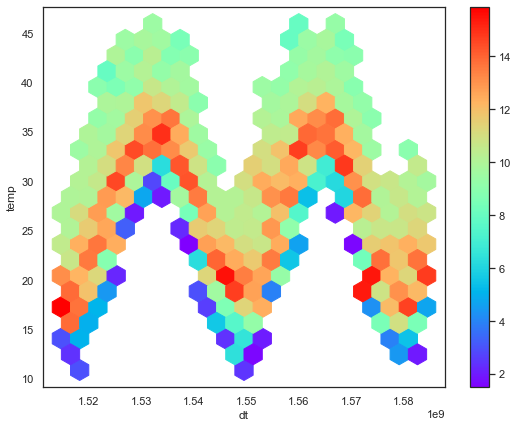

In [8]:
data.plot(
    kind='hexbin',
    x='dt',
    y='temp',
    C='date',
    gridsize=20,
    figsize=(9,7),
    cmap="rainbow", # defaults to greenish
    sharex=False # required to get rid of a bug
)

# Traffic data Preprocessing
**i have downloaded the datasets for public transport(RTA dubai pulse) for the dates which were common with the weather dataset.(01-Jan-2018 to 31-Mar-2018) in a file and have preprocessed the datasets and got the hourly traffic flow numbers on each of the days (between 01-Jan-2018 to 31-Mar-2018) these hourly traffic flows were appended to the weather dataset.**

**Future aim:To analyse how traffic would increase or decrease during various weather cconditions using machine learning models**

In [9]:
data['traffic']=0
data.head()

,dt_iso,dt,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,date,traffic
0,2018-01-01 00:00:00,1514764800,14.99,13.70,1015,87,3.1,150,1,NaN,NaN,Clear,sky is clear,0,0
1,2018-01-01 01:00:00,1514768400,14.63,13.91,1015,93,2.6,150,1,NaN,NaN,Clear,sky is clear,1,0
2,2018-01-01 02:00:00,1514772000,14.03,13.89,1016,93,1.5,150,1,NaN,NaN,Clear,sky is clear,2,0
3,2018-01-01 03:00:00,1514775600,13.78,13.14,1016,93,2.1,180,1,NaN,NaN,Mist,mist,3,0
4,2018-01-01 04:00:00,1514779200,14.28,13.45,1017,93,2.6,160,1,NaN,NaN,Mist,mist,4,0


In [10]:
with os.scandir("C:\\Users\\Taha\\Documents\\SUMMER\\datathon2020\\all traffic data\\") as files:
    for file in files:
        print("Accessing file"+':'+file.name)
        date=str(file.name[22:24])
        month=str(file.name[19:21])
        year=str(file.name[14:18])
        date=year+'-'+month+'-'+date+' '
        
        
        #filter the data with only the dates of the filename and sort in order of hours of the day.
        week_day = pd.read_csv("C:\\Users\\Taha\\Documents\\SUMMER\\datathon2020\\all traffic data\\"+file.name)
        weekday=week_day[['txn_date','txn_time']]
        weekday["datetime"] = weekday["txn_date"] +' ' +weekday["txn_time"]
        weekday.drop(['txn_time','txn_date'],axis=1,inplace=True)
        weekday.sort_values(by=['datetime'],inplace=True)
        weekday=weekday.reset_index(drop=True)
        weekday1 =weekday['datetime'].str.contains(date) 
        weekday1=weekday[weekday1]
        weekday1= weekday1.reset_index(drop=True)
        weekday1['datetime'] = pd.to_datetime(weekday1['datetime'])
        weekday1= weekday1.reset_index(drop=True)
            
        #finding the traffic flow during each hour on each of the common days between weather and transport datasets 
        #and appending it to the weather dataset for analysis    
        for i in range(0,24):
            if i<10:
                start_s=str(date)+'0'+str(i)+':00:00'
            else:
                start_s=str(date)+str(i)+':00:00'
            end_s=str(date)+str(i)+':59:59'
            start= datetime.strptime(start_s, '%Y-%m-%d %H:%M:%S')
            end=datetime.strptime(end_s,'%Y-%m-%d %H:%M:%S')
            traffic=weekday1[(weekday1['datetime'] >=start) & (weekday1['datetime'] <=end )].count()
            data.loc[data['dt_iso']==(str(start_s)),'traffic']=traffic[0]
            #print(str(start_s),traffic[0])

Accessing file:bus_ridership_2018-03-01_00-00-00.csv


C:\Users\Taha\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Taha\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Taha\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipy

Accessing file:bus_ridership_2018-03-02_00-00-00.csv
Accessing file:bus_ridership_2018-03-03_00-00-00.csv
Accessing file:bus_ridership_2018-03-04_00-00-00.csv
Accessing file:bus_ridership_2018-03-05_00-00-00.csv


C:\Users\Taha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Accessing file:bus_ridership_2018-03-06_00-00-00.csv
Accessing file:bus_ridership_2018-03-07_00-00-00.csv
Accessing file:bus_ridership_2018-03-08_00-00-00.csv
Accessing file:bus_ridership_2018-03-09_00-00-00.csv
Accessing file:bus_ridership_2018-03-10_00-00-00.csv
Accessing file:bus_ridership_2018-03-11_00-00-00.csv
Accessing file:bus_ridership_2018-03-12_00-00-00.csv
Accessing file:bus_ridership_2018-03-13_00-00-00.csv
Accessing file:bus_ridership_2018-03-14_00-00-00.csv
Accessing file:bus_ridership_2018-03-15_00-00-00.csv
Accessing file:bus_ridership_2018-03-16_00-00-00.csv
Accessing file:bus_ridership_2018-03-17_00-00-00.csv
Accessing file:bus_ridership_2018-03-18_00-00-00.csv
Accessing file:bus_ridership_2018-03-19_00-00-00.csv
Accessing file:bus_ridership_2018-03-20_00-00-00.csv
Accessing file:bus_ridership_2018-03-21_00-00-00.csv
Accessing file:bus_ridership_2018-03-22_00-00-00.csv
Accessing file:bus_ridership_2018-03-23_00-00-00.csv
Accessing file:bus_ridership_2018-03-24_00-00-

In [11]:
data2=data[data['traffic']!=0]
data2.reset_index(inplace=True)

In [12]:
data2.fillna(0,inplace=True)

C:\Users\Taha\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [13]:
data2=data2.drop(['index'],axis=1)

In [14]:
data2

,dt_iso,dt,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,date,traffic
0,2018-03-01 00:00:00,1519862400,21.67,20.27,1010,60,3.60,70,0,0.0,0.0,Clear,sky is clear,0,9191
1,2018-03-01 01:00:00,1519866000,20.91,19.27,1010,60,3.60,70,0,0.0,0.0,Clear,sky is clear,1,2798
2,2018-03-01 02:00:00,1519869600,19.86,20.75,1010,88,2.60,60,0,0.0,0.0,Clear,sky is clear,2,647
3,2018-03-01 03:00:00,1519873200,20.60,18.99,1011,57,3.09,80,1,0.0,0.0,Clear,sky is clear,3,462
4,2018-03-01 04:00:00,1519876800,20.26,22.09,1012,88,1.50,60,1,0.0,0.0,Clear,sky is clear,4,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,2020-03-16 19:00:00,1584385200,22.85,22.19,1015,64,3.60,50,0,0.0,0.0,Clear,sky is clear,19,109324
3282,2020-03-16 20:00:00,1584388800,22.35,21.17,1015,68,4.60,60,0,0.0,0.0,Clear,sky is clear,20,74526
3283,2020-03-16 21:00:00,1584392400,21.52,21.43,1015,72,3.10,60,0,0.0,0.0,Clear,sky is clear,21,54814
3284,2020-03-16 22:00:00,1584396000,21.04,21.19,1014,77,3.10,70,0,0.0,0.0,Clear,sky is clear,22,44308


In [15]:
data2.to_csv('weather_and_traffic.csv',index=False)
